In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset (assuming you have the csv file from the notebook)
df = pd.read_csv('data/heart_cleveland_upload.csv')

print(df)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [42]:
# Separate Target and Features
target = 'condition'
X = df.drop(columns=[target])  # All columns except 'condition'
print(X)
y = df[target]                 # 'condition' column (0 or 1)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [43]:
X_scaled = normalize(X, norm='l2', axis=0)
print(X_scaled)


[[0.07242048 0.07053456 0.         ... 0.06726728 0.05018856 0.        ]
 [0.07242048 0.         0.         ... 0.         0.10037712 0.        ]
 [0.06927177 0.         0.         ... 0.13453456 0.         0.        ]
 ...
 [0.03673503 0.07053456 0.07365429 ... 0.06726728 0.         0.09147787]
 [0.03673503 0.         0.07365429 ... 0.         0.         0.        ]
 [0.03673503 0.07053456 0.07365429 ... 0.         0.         0.09147787]]


In [44]:
# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Condition'] = y

# Calculate how much information (variance) we kept
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
# Example Output: [0.23, 0.12] (Means PC1 holds 23% of info, PC2 holds 12%)

Explained Variance Ratio: [0.27434279 0.1788421  0.11408075]


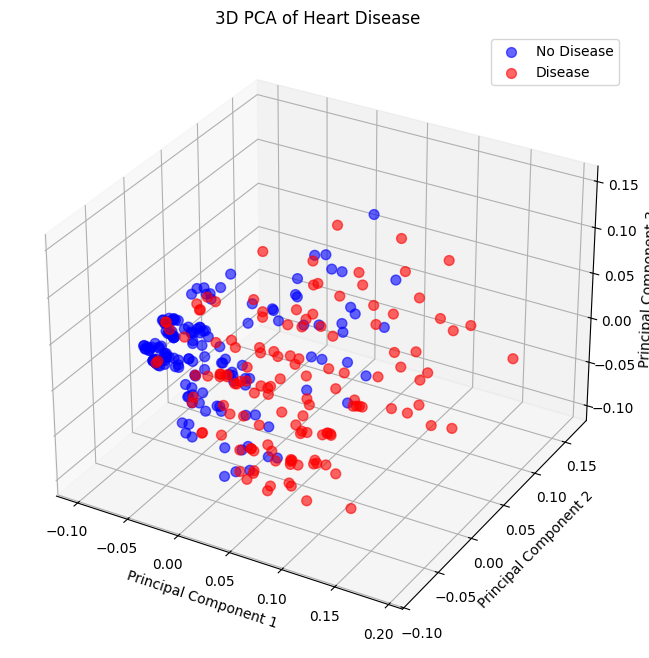

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# We loop through targets to assign colors manually
targets = [0, 1]
colors = ['b', 'r']
labels = ['No Disease', 'Disease']

for target, color, label in zip(targets, colors, labels):
    indicesToKeep = y == target
    ax.scatter(
        X_pca[indicesToKeep, 0], # PC1
        X_pca[indicesToKeep, 1], # PC2
        X_pca[indicesToKeep, 2], # PC3
        c=color,
        s=50,
        alpha=0.6,
        label=label
    )

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.title('3D PCA of Heart Disease')
plt.show()